# Data import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import raw dataset
import pandas as pd

metadata = pd.read_csv('/content/drive/MyDrive/Movies/movies_metadata.csv')


<ipython-input-2-bcf7ba7d375d>:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/content/drive/MyDrive/Movies/movies_metadata.csv')


In [3]:
# display all columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

# Data preprocessing

- Take a look at the overview dataset
- Clean each column
- Filter inappropriate values
- convert data types

## Overview

In [4]:
# length of our dataset
metadata.shape

(45466, 25)

In [5]:
# Take a look at what this dataset looks like
metadata.head(2)

,Unnamed: 0,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [6]:
# Check the data type
metadata.dtypes

Unnamed: 0                 int64
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
# Check the numbers of null values for each column
metadata.isnull().sum()

Unnamed: 0                   0
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

After checking original dataframe, we can do cleaning as below:
* budget,belongs_to_collection can convert to int
* genres can convert to numerical data
* Realease_date can be separated to year and month
* To reduce the complexity, we will drop all other categorical features
* Drop revenue because the ratings are predicted before releasing

## Data cleaning

### Genres Cleaning
We need to extract genres from the column

In [8]:
# Check the structure of a genres cell
eval(metadata.genres[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [9]:
# Extract the genres names only
genres_ = [[i['name'] for i in eval(metadata['genres'][j])] for j in range(metadata.shape[0])]
genres_[:5]

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

In [10]:
# Replace the genres feature with the cleaned one
metadata.drop(['genres'],axis=1,inplace=True)
metadata['genres'] = genres_
metadata.head(2)

,Unnamed: 0,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"


### Genres encoding

In [11]:
# Our target is multivalues, so we use MultiLabelBinarizer instead of OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Encode using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded_features = mlb.fit_transform(metadata['genres'])

# Combine Encoded Features
encoded_df = pd.DataFrame(encoded_features, columns=mlb.classes_)
metadata = pd.concat([metadata.drop(columns=['genres']), encoded_df], axis=1)

metadata.head()

,Unnamed: 0,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### belong_to_collection
Switch to 1 if the movies belongs to a collection, to 0 if not

In [12]:
# switch this belong_to_collection values to int 1/0
metadata['belongs_to_collection'].fillna(0,inplace=True)
collections = metadata['belongs_to_collection'].copy()
collections[collections != 0 ] = 1
metadata['belongs_to_collection'] = collections
metadata['belongs_to_collection'] = metadata['belongs_to_collection'].astype('int64')
metadata.head(2)

,Unnamed: 0,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,False,1,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,False,0,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Release date
Extract release month

In [13]:
metadata['release_date'] = pd.to_datetime(metadata['release_date'],errors = 'coerce')
# metadata['release_year'] = metadata['release_date'].dt.year
metadata['release_month'] = metadata['release_date'].dt.month

### numerical feature selection
Besides all non-numerical features, we'll keep genres, belongs_to_collection and release data. Genres is an important feature for movies, belongs_to_collection and release date can convert to numerical data easily.

In [14]:
metadata.columns

Index(['Unnamed: 0', 'adult', 'belongs_to_collection', 'budget', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation',
       'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands',
       'History', 'Horror', 'Mardock Scramble Production Committee', 'Music',
       'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State',
       'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western', 'release_month'],
      dtype='object')

In [15]:
# we'll predict the movie ratings before its release, so we'll delete revenue for our prediction
# keep id and title temporarily for later cleaning and eda
meta = metadata[['id','title','belongs_to_collection', 'budget', 'runtime',
       'vote_average', 'vote_count',
       'release_month','Action',
       'Adventure', 'Animation', 'Aniplex', 'BROSTA TV',
       'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western']].copy()
meta.head(2)

,id,title,belongs_to_collection,budget,runtime,vote_average,vote_count,release_month,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,862,Toy Story,1,30000000,81.0,7.7,5415.0,10.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,0,65000000,104.0,6.9,2413.0,12.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop null values/ duplicated values/ invalid values

In [16]:
# drop overall duplicates and drop duplicated id feature and keep the first one
meta_unique = meta.drop_duplicates().drop_duplicates(subset='id',keep='first')

# drop nulls
meta_no_nulls = meta_unique.dropna()

# filter vote_count<50 and budget=0
meta_no_nulls['budget'] = meta_no_nulls['budget'].astype('int')
meta_clean = meta_no_nulls[(meta_no_nulls['vote_count']>50)&(meta_no_nulls['budget']>0)]

<ipython-input-16-3029fa1f7164>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_no_nulls['budget'] = meta_no_nulls['budget'].astype('int')


In [17]:
meta_clean.shape

(5344, 40)

### Eliminate zero-variance features from genres
After filtering, some genres don't exist, eliminate them before EDA

In [18]:
# find the features whose all values are 0
all_null_features = meta_clean.select_dtypes(include=['float64','int64']).columns[meta_clean.select_dtypes(include=['float64','int64']).sum() == 0]

In [19]:
# drop these features
print(len(meta_clean.columns))
meta_concise = meta_clean.drop(all_null_features,axis=1).reset_index(drop=True)
print(len(meta_concise.columns))

40
27


In [20]:
meta_concise.columns

Index(['id', 'title', 'belongs_to_collection', 'budget', 'runtime',
       'vote_average', 'vote_count', 'release_month', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

## Classify the target
So we can see its relationship with other features in EDA.

I googled for something for reference
https://www.imdb.com/list/ls076459507/ \
1/10 - ‘Do Not Want’\
2/10 - ‘Awful’\
3/10 - ‘Bad’\
4/10 - ‘Nice Try, But No Cigar’\
5/10 - ‘Meh’\
6/10 - ‘Not Bad’\
7/10 - ‘Good’\
8/10 - ‘Very good’\
9/10 - ‘Excellent’\
10/10 - 'Masterpiece'


In [21]:
# bad: 0~5; average: 5~7; good: 7~10
from collections import Counter
bins_ref = [0,5,7,10]
labels_ref = [0,1,2]
meta_concise['rating_class'] = pd.cut(meta_concise['vote_average'], bins = bins_ref,labels=labels_ref).astype(int)
meta_class = meta_concise.drop('vote_average', axis=1)
Counter(meta_class['rating_class'])

Counter({2: 1145, 1: 3806, 0: 393})

In [22]:
meta_class.dtypes

id                        object
title                     object
belongs_to_collection      int64
budget                     int64
runtime                  float64
vote_count               float64
release_month            float64
Action                     int64
Adventure                  int64
Animation                  int64
Comedy                     int64
Crime                      int64
Documentary                int64
Drama                      int64
Family                     int64
Fantasy                    int64
History                    int64
Horror                     int64
Music                      int64
Mystery                    int64
Romance                    int64
Science Fiction            int64
TV Movie                   int64
Thriller                   int64
War                        int64
Western                    int64
rating_class               int64
dtype: object

# Data Understanding by EDA
- high/low rating movies
- distribution
- correlation-heatmap/pairplot

## Top/bottom 10 rated movies
Check if the best/worst movies are intuitively meet our expectations

In [23]:
# Top 10 rated movies
meta_concise[['title','vote_average']].sort_values(by=['vote_average'],ascending=False).head(10)

,title,vote_average
2600,Dilwale Dulhania Le Jayenge,9.1
4974,Human,8.6
118,The Shawshank Redemption,8.5
276,The Godfather,8.5
193,Schindler's List,8.3
1101,Fight Club,8.3
4556,Whiplash,8.3
415,Once Upon a Time in America,8.3
411,The Godfather: Part II,8.3
409,Psycho,8.3


The Shawshank Redemption, The Godfather and Schindler's List are globally famous movies

In [24]:
# Bottom 10 rated movies
meta_concise[['title','vote_average']].sort_values(by=['vote_average'],ascending=True).head(10)

# Drop vote_average/id/title after checking the top/bottom ranking movies
meta_numerical = meta_concise.drop(['id','title','vote_average'],axis=1)

Never heared any of these movies

## Distribution by Histogram

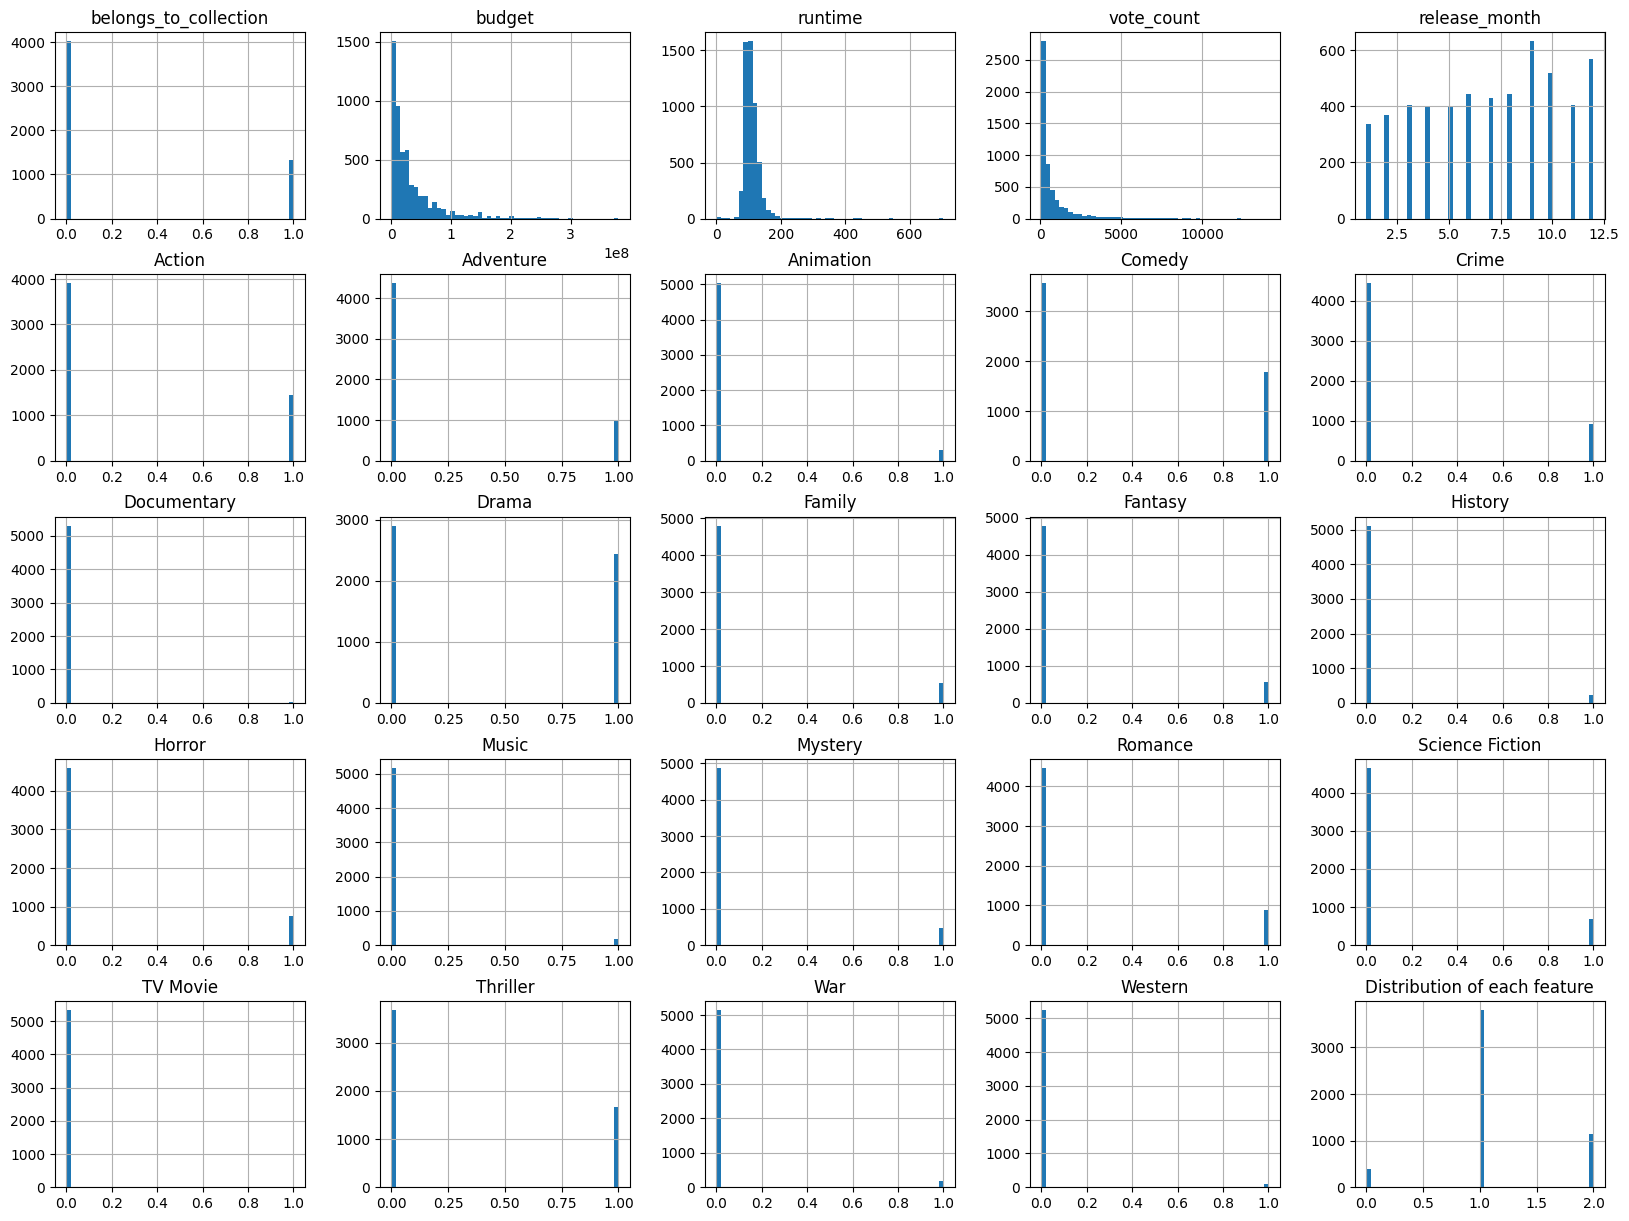

In [25]:
# check distribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
meta_numerical.hist(bins=50, figsize=(20,15))
plt.title('Distribution of each feature')
plt.show()

We can see from above distributions,
- some expanded new features have low variance: Documentary, TV Movie. We'll set a threshold 95% to eliminate these features later in feature selection.
- Runtime and vote_average seem normally distributed, other features are not normally distributed, and we have high dimentional dataset, so we choose k-means to detect and eliminate the outliers later.
- vote_count has a peaked distribution

## Correlation by Heatmap

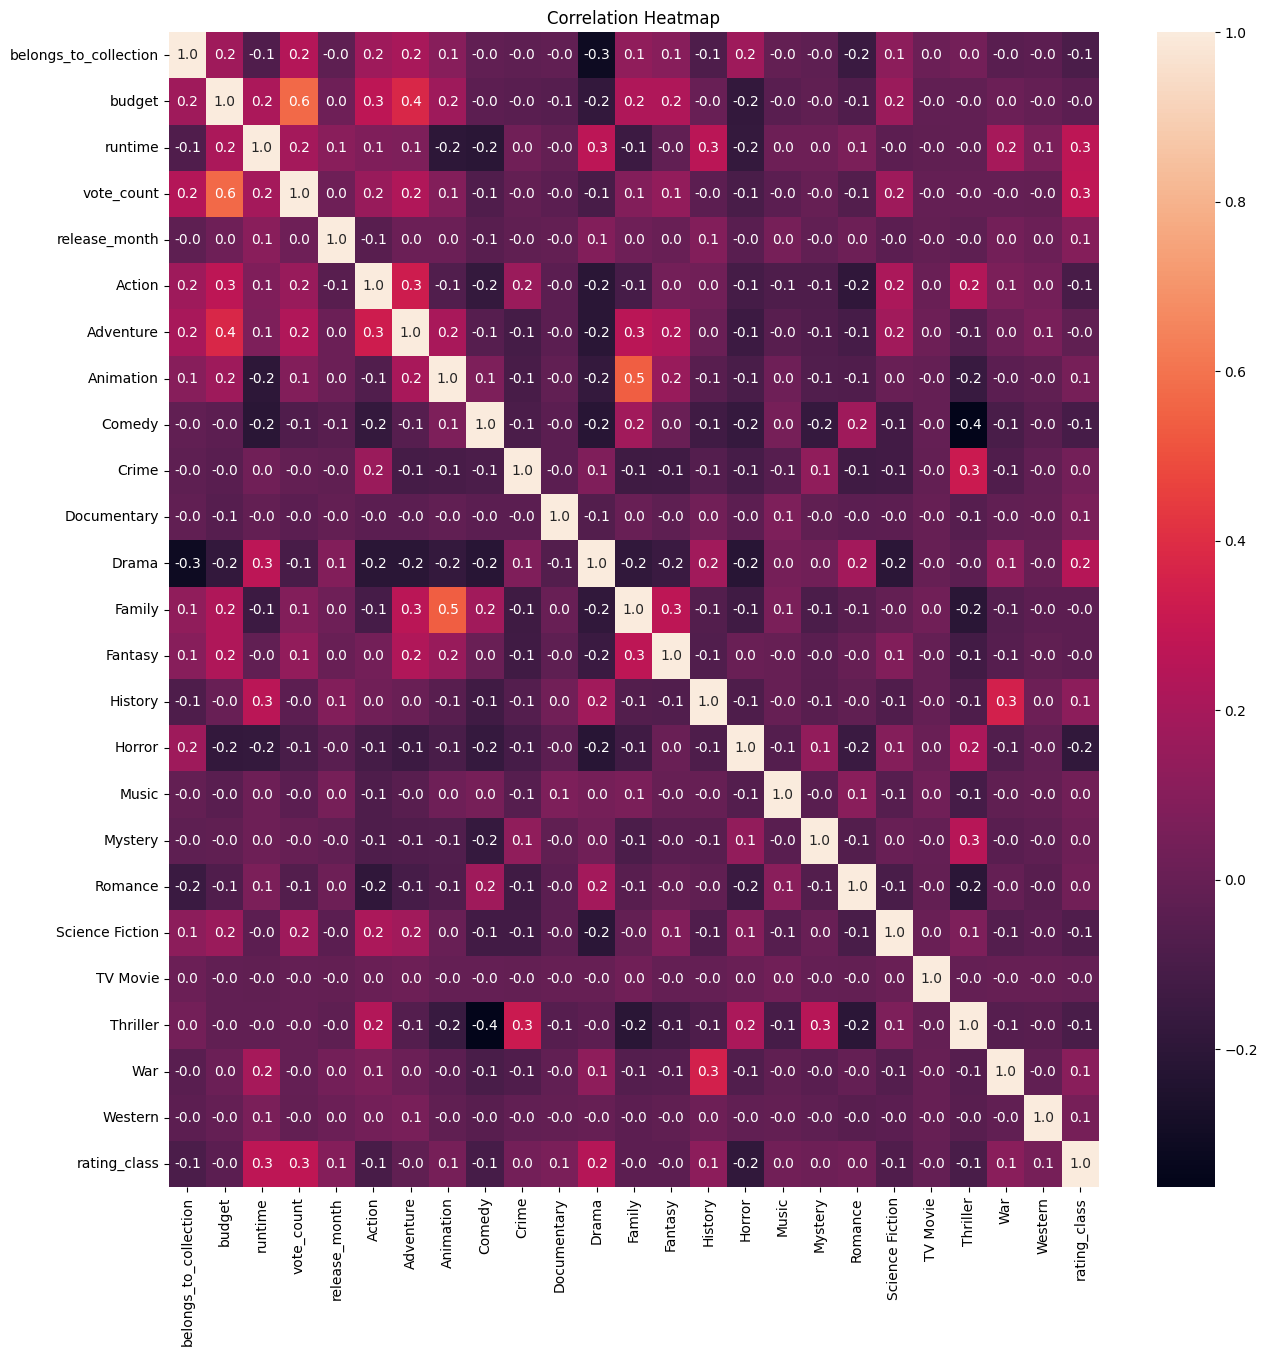

In [26]:
# check correlation coefficient
plt.figure(figsize=(15,15))
sns.heatmap(meta_numerical.corr(),annot=True,fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

these features have relatively high correlation:\
budget vs vote_count: 0.6\
Family & Animation : 0.5

## Correlation details by Pairplot

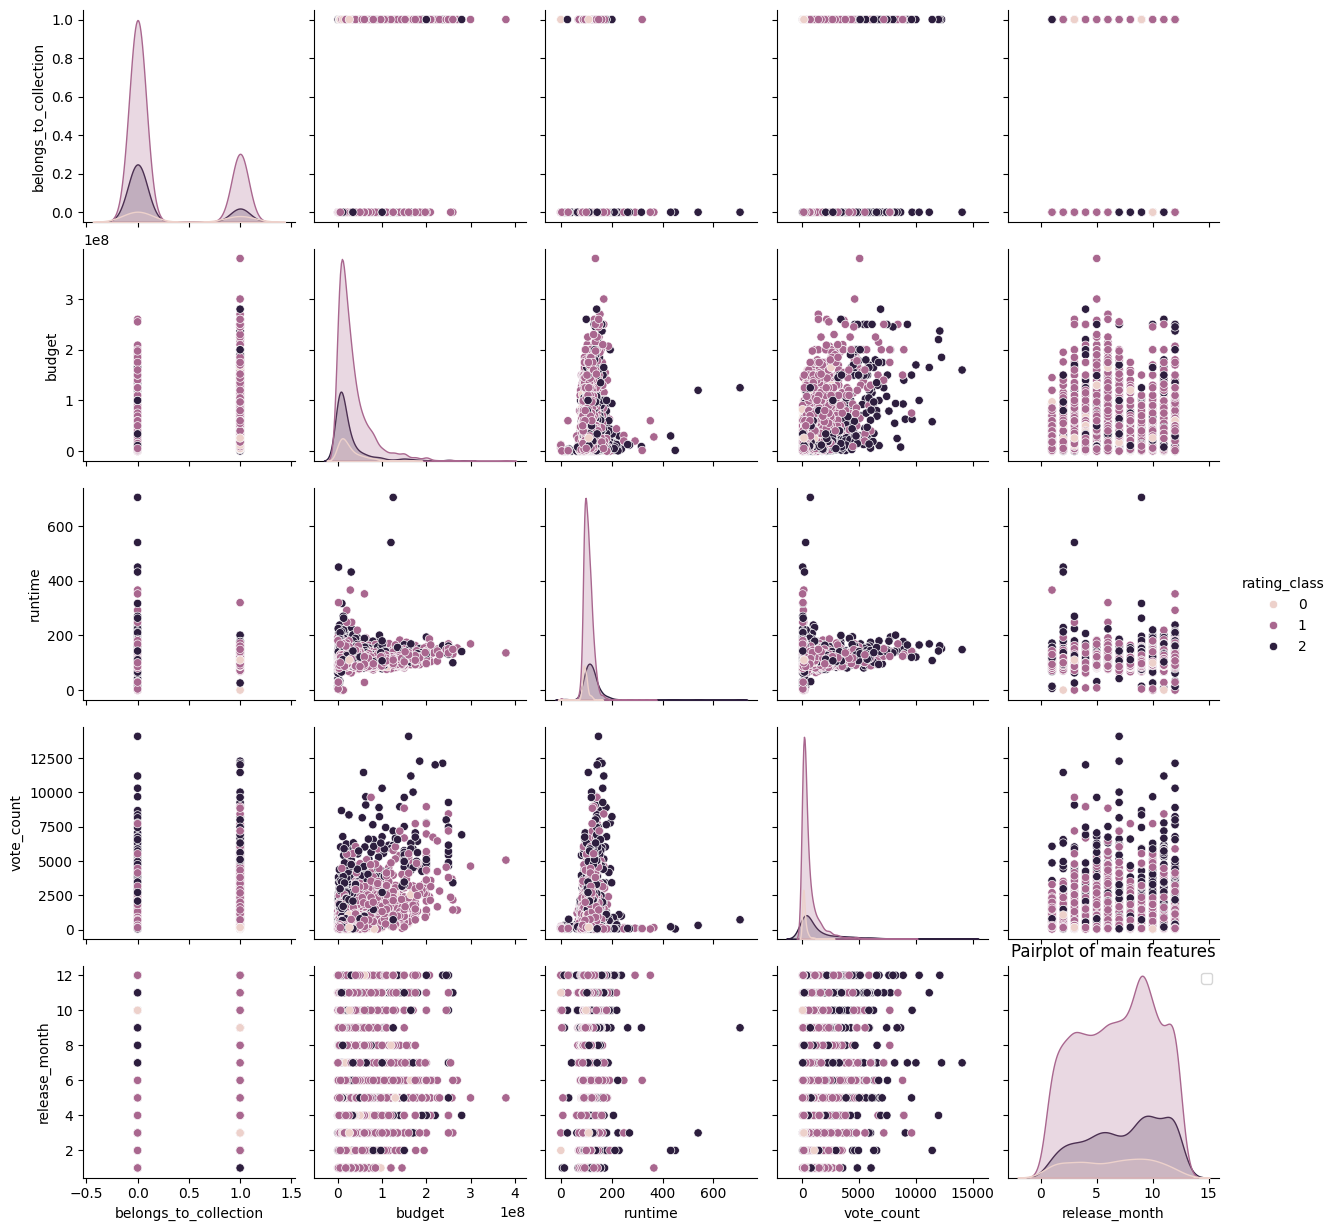

In [27]:
# check linearity, we can see the correlation in heatmap, here we check the scatter plot of each pair of features except the expanded ones, because they're too computational expensive
meta_pairplot = meta_numerical[['belongs_to_collection', 'budget', 'runtime', 'rating_class','vote_count', 'release_month']]
# sns.set(style="ticks")
sns.pairplot(meta_pairplot,hue='rating_class')
plt.title('Pairplot of main features')
plt.legend()
plt.show()


We can see higher vote_counts with higher budget can have higher ratings, but their relationships are not completely linearity.\
There are outliers obviously in budget, runtime

# Feature Engineering
- Detect and eliminate outliers
- Remove low variance features
- Gridsearch to find best feature engineering techniques
- Feature scaling

## Outliers

generally have z-score and IQR method for outliers detection, z-score suit for normally distributed data, IQR suit for skewed data, k-means is not commonly used but is more robust to different distributions and suit for high dimensional dataset. We checked the distribution of features, it has variety of distributions, k-means will be the optimal method for outliers(also this method is suggested by the teacher)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

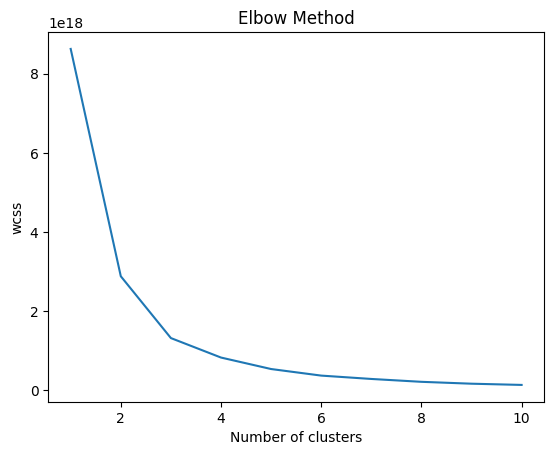

In [28]:
# find good n_clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(meta_numerical)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


The slope after 5 is more smooth, so we choose 5 to be our number of clusters

In [29]:
# find outliers using k-means clustering using 95% threshold
import numpy as np
k_means = KMeans(n_clusters=5,random_state=42)
k_means.fit(meta_numerical)

distances = k_means.transform(meta_numerical)

avg_distances=np.mean(distances,axis=1)
threshold = np.percentile(avg_distances,95)
outliers_indices = np.where(avg_distances > threshold)[0]
outliers = meta_numerical.iloc[outliers_indices,:]

print('Number of outliers detected:',len(outliers_indices))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of outliers detected: 268


In [30]:
print("Before eliminating outliers: ",meta_numerical.shape)
meta_wo_outliers = meta_numerical.drop(outliers_indices,axis=0)
print("After eliminating outliers: ",meta_wo_outliers.shape)

Before eliminating outliers:  (5344, 25)
After eliminating outliers:  (5076, 25)


## Remove low variance features
From the distribution plots, there're some features have low variance and need to be removed

In [31]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.90
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(meta_wo_outliers)
meta_rm_low_variance = meta_wo_outliers[meta_wo_outliers.columns[sel.get_support(indices=True)]]
meta_rm_low_variance.shape

(5076, 16)

## Try pipeline for feature engineering
- MinMaxScaler or StandardScaler
- Oversampling: None, SMOTE or RandomOverSampler
- Reduce Dimensionality: None or PCA with series of components
- Evaluate based on precision

We initially chose precision as our main metric but the result is not good due to extremely low recall scores, so we decided to make a trade-off and set f1-score as our main metric in later hyperparameter tuning phase.


In [32]:
meta_rm_low_variance.columns

Index(['belongs_to_collection', 'budget', 'runtime', 'vote_count',
       'release_month', 'Action', 'Adventure', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Horror', 'Romance', 'Science Fiction', 'Thriller',
       'rating_class'],
      dtype='object')

In [33]:
X = meta_rm_low_variance.drop('rating_class',axis=1)
y = meta_rm_low_variance['rating_class']

In [35]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# split the dataset into train and test set during this test
X_train_pp,X_test_pp,y_train_pp,y_test_pp = train_test_split(X,y,test_size=.2, stratify=y, random_state=42)
# Define pipeline steps
steps = [
    ('scaler', 'passthrough'),     # Placeholder for scaler step
    ('pca',PCA()),
    ('oversampler', 'passthrough'),  # Placeholder for oversampling step
    ('classifier', 'passthrough')     # Placeholder for classifier step
]

# Define parameter grid
# For inherently binary-class classifiers, use ovo splitting criterion: svm and logistic
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components':[None,3, 5, 10],
    'oversampler': [None, SMOTE(), RandomOverSampler()],
    'classifier': [RandomForestClassifier(), SVC(decision_function_shape='ovo'), KNeighborsClassifier(), OneVsOneClassifier(LogisticRegression()), XGBClassifier()]
}

# Create pipeline
pipeline = Pipeline(steps)

# Our class is imbalanced so we use stratifiedkfold to make sure the least number class occurs in each validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # shuffle=True ensures that the data is shuffled before splitting it into folds, which helps in reducing potential biases in the cross-validation process

"""Given that my particularly concerned about avoiding investing in bad movies,
which are in the minority class, 'macro' averaging ensures that the model's performance on the minority class is not overshadowed by the majority class. """
# Perform grid search with pipeline
grid_search_test = GridSearchCV(pipeline, param_grid, cv=cv, scoring='precision_macro', n_jobs=-1, verbose=2, return_train_score=True)
grid_search_test.fit(X_train_pp, y_train_pp)

# Get best parameters and best estimator
best_params = grid_search_test.best_params_
best_estimator = grid_search_test.best_estimator_


print("Best Parameters:", best_params)
print(grid_search_test.best_score_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Parameters: {'classifier': RandomForestClassifier(), 'oversampler': None, 'pca__n_components': None, 'scaler': StandardScaler()}
0.6529231301015748


In [36]:
# Check details for the gridsearch results
results_test = pd.DataFrame(grid_search_test.cv_results_)
results_test = results_test.sort_values('rank_test_score').reset_index()
results_test.drop(['index'],axis=1)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_oversampler,param_pca__n_components,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.075805,0.049776,0.102928,0.003228,RandomForestClassifier(),None,None,StandardScaler(),"{'classifier': RandomForestClassifier(), 'over...",0.592411,0.768386,0.597972,0.652923,0.081676,1,0.999828,1.000000,1.000000,0.999943,0.000081
1,3.465458,0.837323,0.073036,0.009830,"XGBClassifier(base_score=None, booster=None, c...",None,None,StandardScaler(),"{'classifier': XGBClassifier(base_score=None, ...",0.575219,0.663493,0.662063,0.633592,0.041280,2,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.042862,0.002024,0.010876,0.002099,OneVsOneClassifier(estimator=LogisticRegressio...,None,10,StandardScaler(),{'classifier': OneVsOneClassifier(estimator=Lo...,0.544833,0.532446,0.808663,0.628647,0.127391,3,0.479271,0.628627,0.540818,0.549572,0.061288
3,0.048009,0.005163,0.010851,0.000801,OneVsOneClassifier(estimator=LogisticRegressio...,None,None,StandardScaler(),{'classifier': OneVsOneClassifier(estimator=Lo...,0.600283,0.636759,0.628858,0.621967,0.015668,4,0.666531,0.694575,0.718768,0.693291,0.021345
4,0.045932,0.006226,0.009178,0.000314,OneVsOneClassifier(estimator=LogisticRegressio...,None,5,StandardScaler(),{'classifier': OneVsOneClassifier(estimator=Lo...,0.586958,0.477978,0.786357,0.617098,0.127686,5,0.575114,0.590294,0.474797,0.546735,0.051244


We choose not to oversample or conduct pca on our dataset; And scaling with StandardScaler.

## Feature Scaling
Scaling on dataset directly to simplify the steps, since we don't need other steps like oversampling or pca

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,belongs_to_collection,budget,runtime,vote_count,release_month,Action,Adventure,Comedy,Crime,Drama,Fantasy,Horror,Romance,Science Fiction,Thriller
0,1.775907,-0.009246,-1.120600,4.166865,0.890025,-0.602840,-0.463925,1.393775,-0.457011,-0.929213,-0.334572,-0.391965,-0.447848,-0.374724,-0.680312
1,-0.563093,1.053752,-0.209930,1.502532,1.477130,-0.602840,2.155522,-0.717476,-0.457011,-0.929213,2.988890,-0.391965,-0.447848,-0.374724,-0.680312
2,-0.563093,0.901895,2.403299,1.034809,1.477130,1.658814,-0.463925,-0.717476,2.188130,1.076180,-0.334572,-0.391965,-0.447848,-0.374724,1.469914
3,-0.563093,0.841152,0.700741,-0.513912,1.477130,-0.602840,-0.463925,1.393775,-0.457011,-0.929213,-0.334572,-0.391965,2.232901,-0.374724,-0.680312
4,-0.563093,0.142611,-0.130741,-0.484624,1.477130,1.658814,2.155522,-0.717476,-0.457011,-0.929213,-0.334572,-0.391965,-0.447848,-0.374724,1.469914


# Model

Our train set has 9000 rows and 15 features, and the relationships between features are complex.

**Logistic Regression** and **KNN** are good starting points, they are simple and efficient. And can handle multiclass classification tasks well. KNN can be effective with a moderately sized dataset. \

**Random Forest** and **Gradient Boosting** are effective for handling high-dimensional datasets with complex relationships. They are robust to noise and overfitting, making them suitable for multiclass classification tasks with a moderate number of features



Below are the reasons for choosing ovo approach for logistic regression.\
Since I oversampled the class and my training set is not large, so it won't be very computational expensive to choose ovo. I'll choose random forest for feature importance, so I won't count model interpretability on ovr. Besides, ovo trains multiple binary classifiers, which can potentially improve robustness to noisy data or mislabeled instances.

## Evaluate model performance based on train sets with more evaluation metrics

In [38]:
from sklearn.model_selection import cross_validate,StratifiedKFold,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# split the dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2, stratify=y, random_state=42) # since the class is imbalanced, set stratify=y to make sure that class distribution is in both sets

# Construct classifiers
logistic_regression = OneVsOneClassifier(LogisticRegression())
knn = KNeighborsClassifier()
svc = SVC(decision_function_shape='ovo')
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

models = [logistic_regression, knn, svc, random_forest, xgboost]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'] # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for model in models:

  cv_results = cross_validate(model,X_train, y_train, return_train_score= True, n_jobs=-1, cv=stratified_kfold, scoring=metrics)
  results.append({
        'Model': type(model).__name__,
        'Train Accuracy': cv_results['train_accuracy'].mean(),
        'Train Precision': cv_results['train_precision_macro'].mean(),
        'Train Recall': cv_results['train_recall_macro'].mean(),
        'Train F1 Score': cv_results['train_f1_macro'].mean(),
        'Test Accuracy': cv_results['test_accuracy'].mean(),
        'Test Precision': cv_results['test_precision_macro'].mean(),
        'Test Recall': cv_results['test_recall_macro'].mean(),
        'Test F1 Score': cv_results['test_f1_macro'].mean()
 })

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the results table
df_results







,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Test Accuracy,Test Recall,Test F1 Score
0,OneVsOneClassifier,0.776108,0.677663,0.477358,0.501317,0.775123,0.474830,0.497790
1,KNeighborsClassifier,0.796244,0.723607,0.538065,0.581435,0.741626,0.453967,0.473066
2,SVC,0.790517,0.731053,0.469689,0.484318,0.770197,0.444785,0.451198
3,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.774384,0.488783,0.512547
4,XGBClassifier,0.991933,0.994946,0.984551,0.989665,0.764778,0.538537,0.564548


Random Forest fits well and generalizes well but overfitting, it's the best model but we need to prune it

## Hyperpamameter tuning

The reason for choosing the F1-score as the evaluation metric:

Focus on Balance: The F1-score provides a balance between precision and recall. It considers both false positives and false negatives, making it suitable for situations where both types of errors are important. As a movie investor, I aim to minimize both the risk of investing in bad movies (false positives) and the missed opportunities of investing in good movies (false negatives).

Imbalanced Dataset: While precision is less affected by class imbalance, the F1-score offers a more holistic evaluation by considering both precision and recall. In scenarios where the dataset is imbalanced, such as having fewer samples in the bad movie class, the F1-score provides a comprehensive assessment of the model's performance in identifying good movies while accounting for the rarity of bad movies.

Comprehensive Evaluation: It's crucial to consider multiple metrics when evaluating a model. The F1-score complements precision by incorporating recall, providing a more complete understanding of the model's performance. By examining both precision and recall, I can make more informed decisions about the effectiveness of the model in identifying good movies for investment.

Threshold Adjustment: Similar to precision, I can adjust the threshold for predicting the positive class to optimize the F1-score according to my investment criteria and risk tolerance. This flexibility allows me to fine-tune the model to achieve the desired balance between precision and recall based on my specific preferences and objectives.

In summary, as a movie investor facing an imbalanced dataset, focusing on the F1-score offers a balanced approach to identify good movies for investment while mitigating the risk of investing in bad ones.

In [41]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for hyperparameter tuning
param_grid = {'criterion':['gini','entropy'],
        'n_estimators': np.linspace(10,50,5,dtype=int), # try increasing this if overfitting
        'max_depth': np.linspace(5,20,5,dtype=int),
        'min_samples_leaf':np.linspace(1, int(0.05*len(X_train)), num = 5, dtype=int), # too low lead to overfitting, 1-5%
        'min_samples_split':np.linspace(2, int(0.05*len(X_train)), num = 5, dtype=int), # values too low can lead to overly complex trees(overfitting) 2-10% of dataset
        'max_features': np.linspace(0.3,0.5,3,endpoint=True) # determines how many features each tree is randomly assigned
        }

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest, param_grid, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_criterion = grid_search.best_params_['criterion']
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_max_features = grid_search.best_params_['max_features']

# Train Random Forest classifier with the best hyperparameters
random_forest_best = RandomForestClassifier(criterion = best_criterion, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, max_features = best_max_features, n_estimators = best_n_estimators)

random_forest_best.fit(X_train, y_train)

# Print the results
print('Best criterion:', best_criterion)
print('Best n_estimators:', best_n_estimators)
print('Best max_depth:', best_max_depth)
print('Best min_samples_leaf:', best_min_samples_leaf)
print('Best min_samples_split:', best_min_samples_split)
print('Best max_features:', best_max_features)



Best criterion: entropy
Best n_estimators: 20
Best max_depth: 20
Best min_samples_leaf: 1
Best min_samples_split: 2
Best max_features: 0.5


In [42]:
# Evaluate the model using cross-validation on the train set
# While using precision to tune the model, use all metrics to evaluate its performance
cv_results_rf = cross_validate(random_forest_best, X_train, y_train, return_train_score= True, n_jobs=-1, cv=stratified_kfold, scoring = metrics)

print('Train Accuracy:', cv_results_rf['train_accuracy'].mean())
print('Train Precision:', cv_results_rf['train_precision_macro'].mean())
print('Train Recall:', cv_results_rf['train_recall_macro'].mean())
print('Train F1 Score:', cv_results_rf['train_f1_macro'].mean())
print('Test Accuracy:', cv_results_rf['test_accuracy'].mean())
print('Test Precision:', cv_results_rf['test_precision_macro'].mean())
print('Test Recall:', cv_results_rf['test_recall_macro'].mean())
print('Test F1 Score:', cv_results_rf['test_f1_macro'].mean())

Train Accuracy: 0.9945812807881774
Train Precision: 0.9972826369310163
Train Recall: 0.9872698153534613
Train F1 Score: 0.9922034000416637
Test Accuracy: 0.768472906403941
Test Precision: 0.6512066670540597
Test Recall: 0.5211498908066503
Test F1 Score: 0.5523901147872796


Still overfitting, but the metrics on validation set improved a bit.

## Final model testing

Accuracy: 0.7627952755905512
Precision: 0.6317182012072828
Recall: 0.5319617076071893
F1 Score: 0.5640639308757017


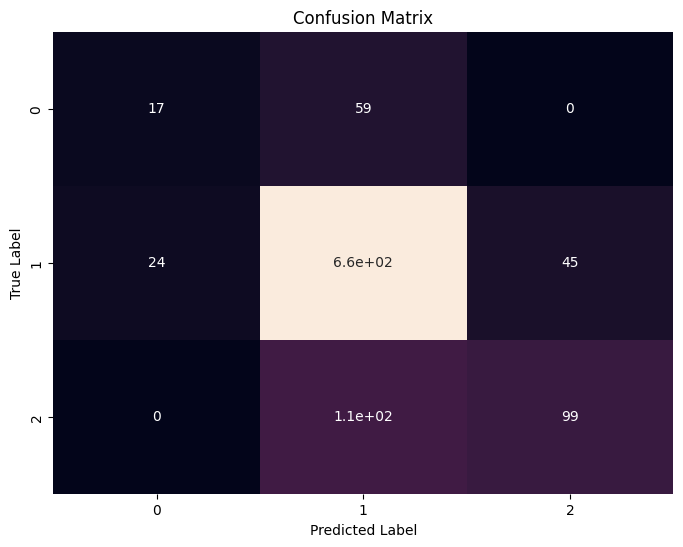

In [43]:

# Make predictions on the test set
y_pred = random_forest_best.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf,annot=True,cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model interpretability

## Feature Importance

Feature ranking:
1. vote_count : (0.269021)
2. runtime : (0.219254)
3. budget : (0.212455)
4. release_month : (0.087280)
5. Drama : (0.037278)
6. belongs_to_collection : (0.021386)
7. Comedy : (0.020902)
8. Thriller : (0.020526)
9. Action : (0.019927)
10. Horror : (0.019111)
11. Adventure : (0.016792)
12. Crime : (0.015106)
13. Romance : (0.014145)
14. Science Fiction : (0.014040)
15. Fantasy : (0.012778)


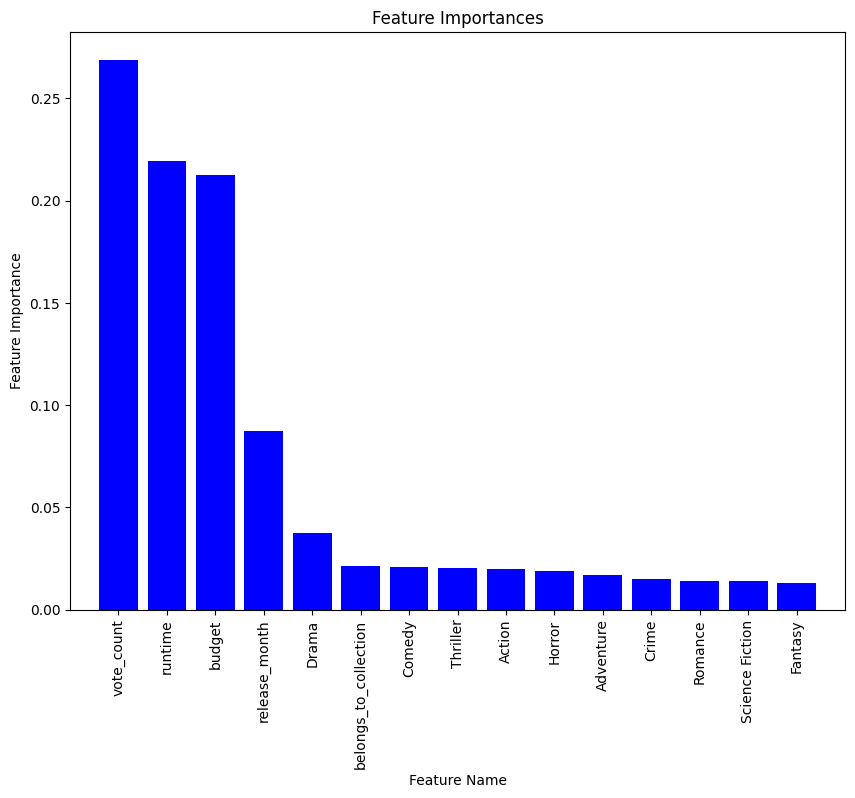

In [44]:
feature_importances = random_forest_best.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
  print('%d. %s : (%f)' % (f + 1, X_train.columns[indices[f]], feature_importances[indices[f]] ))

# Creating the bar plot
plt.figure(figsize=(10, 7.5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.xlim([-1, X_train.shape[1]])
plt.show()



I didn't expect the importance of runtime to be so high

## Confusion matrix for each class

In [45]:
def split_confusion_matrix(conf_matrix):
    num_classes = conf_matrix.shape[0]
    split_matrices = []

    for i in range(num_classes):
        # Select the rows and columns corresponding to the current class
        class_indices = np.arange(num_classes)
        rows = conf_matrix[i, :]
        cols = conf_matrix[:, i]

        # Create a 2x2 confusion matrix for the current class
        tp = rows[i]
        fn = np.sum(rows) - tp
        fp = np.sum(cols) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp

        split_matrices.append(np.array([[tp, fn], [fp, tn]]))

    return split_matrices

In [46]:
# Split the confusion matrix into 2x2 matrices for each class
split_matrices = split_confusion_matrix(conf_matrix_rf)

# Print the 2x2 matrices for each class
for i, matrix in enumerate(split_matrices):
    print(f"Confusion matrix for class {i}:")
    print(matrix)
    print()


# Calculate metrics for each class
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Confusion matrix for class 0:
[[ 17  59]
 [ 24 916]]

Confusion matrix for class 1:
[[659  69]
 [172 116]]

Confusion matrix for class 2:
[[ 99 113]
 [ 45 759]]

              precision    recall  f1-score   support

           0       0.41      0.22      0.29        76
           1       0.79      0.91      0.85       728
           2       0.69      0.47      0.56       212

    accuracy                           0.76      1016
   macro avg       0.63      0.53      0.56      1016
weighted avg       0.74      0.76      0.74      1016



We tried many times to improve precision or f1-score on bad movies, precision can be improved with extremely terrible recall and f1-score, below than 0.05. Now we can see all the metrics are still poor on bad movies. Maybe it's due to the dataset limitation, we have't find a better solution yet to improve performance on bad movies.

In [47]:
print("Predicted labels from the test set:")
print(y_pred)

Predicted labels from the test set:
[1 1 1 ... 1 1 1]


# Case Study for a specific good movie

In [48]:
# find the first good movie in prediction and find it's features
list(y_pred).index(2)

3

In [49]:
X_test.head()

,belongs_to_collection,budget,runtime,vote_count,release_month,Action,Adventure,Comedy,Crime,Drama,Fantasy,Horror,Romance,Science Fiction,Thriller
2555,1.775907,-0.555930,-1.001817,-0.131392,1.183578,1.658814,-0.463925,-0.717476,-0.457011,-0.929213,-0.334572,-0.391965,-0.447848,2.668633,1.469914
335,-0.563093,0.598181,-0.011958,-0.427823,0.890025,-0.602840,2.155522,-0.717476,-0.457011,-0.929213,-0.334572,-0.391965,-0.447848,-0.374724,-0.680312
1885,1.775907,-0.738158,-0.685062,-0.567164,-1.751945,-0.602840,-0.463925,-0.717476,-0.457011,-0.929213,-0.334572,2.551250,-0.447848,-0.374724,-0.680312
411,-0.563093,-0.422296,0.779930,1.833576,-0.284184,-0.602840,-0.463925,-0.717476,-0.457011,1.076180,-0.334572,-0.391965,-0.447848,-0.374724,-0.680312
1801,-0.563093,-0.373702,-0.051552,-0.423385,0.009369,-0.602840,-0.463925,-0.717476,-0.457011,1.076180,-0.334572,-0.391965,-0.447848,-0.374724,1.469914


We can see the index of the good movie in X test is 411, lets find the index 411 movie in original dataset

In [50]:
meta_concise.loc[411,:]

id                                          240
title                    The Godfather: Part II
belongs_to_collection                         1
budget                                 13000000
runtime                                   200.0
vote_average                                8.3
vote_count                               3418.0
release_month                              12.0
Action                                        0
Adventure                                     0
Animation                                     0
Comedy                                        0
Crime                                         1
Documentary                                   0
Drama                                         1
Family                                        0
Fantasy                                       0
History                                       0
Horror                                        0
Music                                         0
Mystery                                 

We can see the predicted label is the same as its original label.